##### **Parte 1. Análisis Descriptivo del Dataset**


In [2]:
# Se realizan las importaciones necesarias.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns


In [3]:
# Se carga el dataframe.
df = pd.read_csv('avocado.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
"""
Tenemos bastante información, pero nos decidimos por quedarnos con las siguientes columnas:
date, average_price, total volume, total_bags, small_bags, large_bags, xlarge_bags, type, year, region.
"""
#Cambiamos nombres de columnas AveragePrice por AvgPrice.
df.rename(columns={'AveragePrice': 'AvgPrice'}, inplace=True)

# Droppeamos columnas innecesarias.
df.drop(columns=['Unnamed: 0', '4046', '4225', '4770'], inplace=True)


In [5]:
df.head()

,Date,AvgPrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# Date cambiara de tipo object a datetime64[ns].
df['Date'] = pd.to_datetime(df['Date'])

# No necesitamos el año, ya que lo tenemos en la columna year, por lo que Date no mostrara el año.
df['Date'] = df['Date'].dt.strftime('%m-%d')



In [7]:
# Cambiamos las columnas de tipo object a category.
df['type'] = df['type'].astype('category')
df['region'] = df['region'].astype('category')

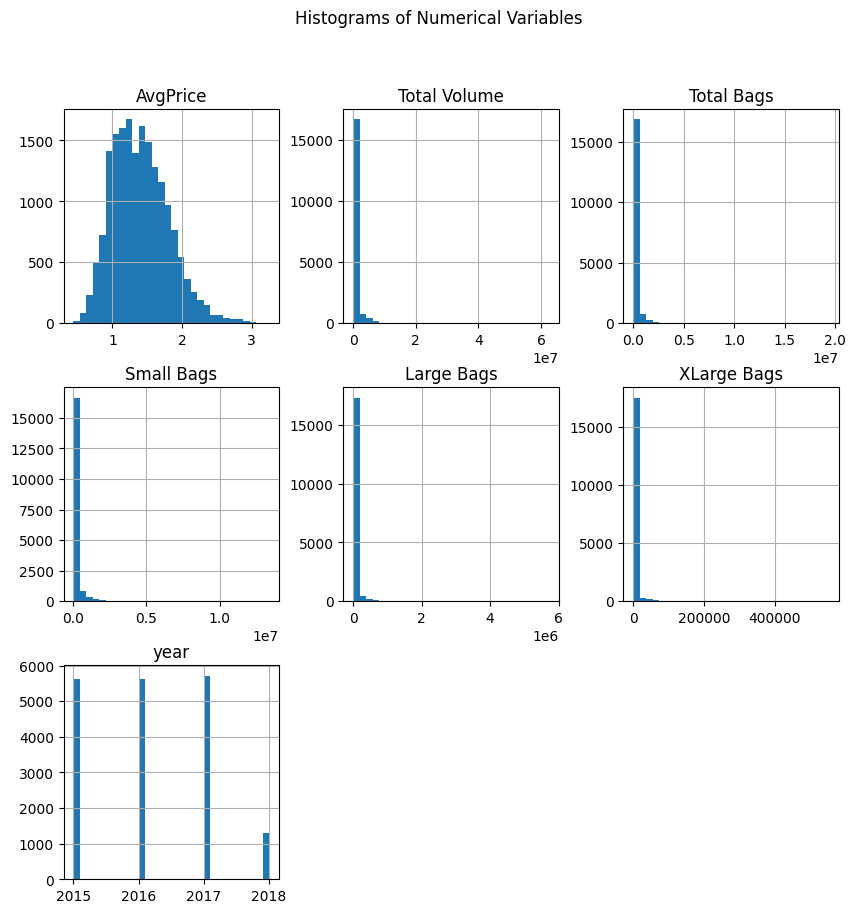

In [8]:
#Vamos a generar visualizaciones exploratorias con Matplotlib y Seaborn.
# Histogramas de las variables numéricas
df.hist(figsize=(10, 10), bins=30)
plt.suptitle('Histograms of Numerical Variables')
plt.show()


### **Interpretación del Gráfico**

El gráfico muestra la distribución del precio promedio (`AvgPrice`) de los aguacates según su tipo (`type`). A partir de la visualización, se pueden observar las siguientes tendencias:

1. **Diferencia de Precios por Tipo**: Los aguacates orgánicos tienen un precio promedio significativamente más alto en comparación con los convencionales. Esto podría deberse a los costos adicionales asociados con la producción orgánica.

2. **Variabilidad en los Precios**: Existe una mayor variabilidad en los precios de los aguacates orgánicos, lo que sugiere que factores como la región, la temporada o la demanda podrían influir más en este tipo de aguacates.

3. **Consistencia en los Aguacates Convencionales**: Los precios de los aguacates convencionales parecen ser más consistentes, con menos dispersión en comparación con los orgánicos.

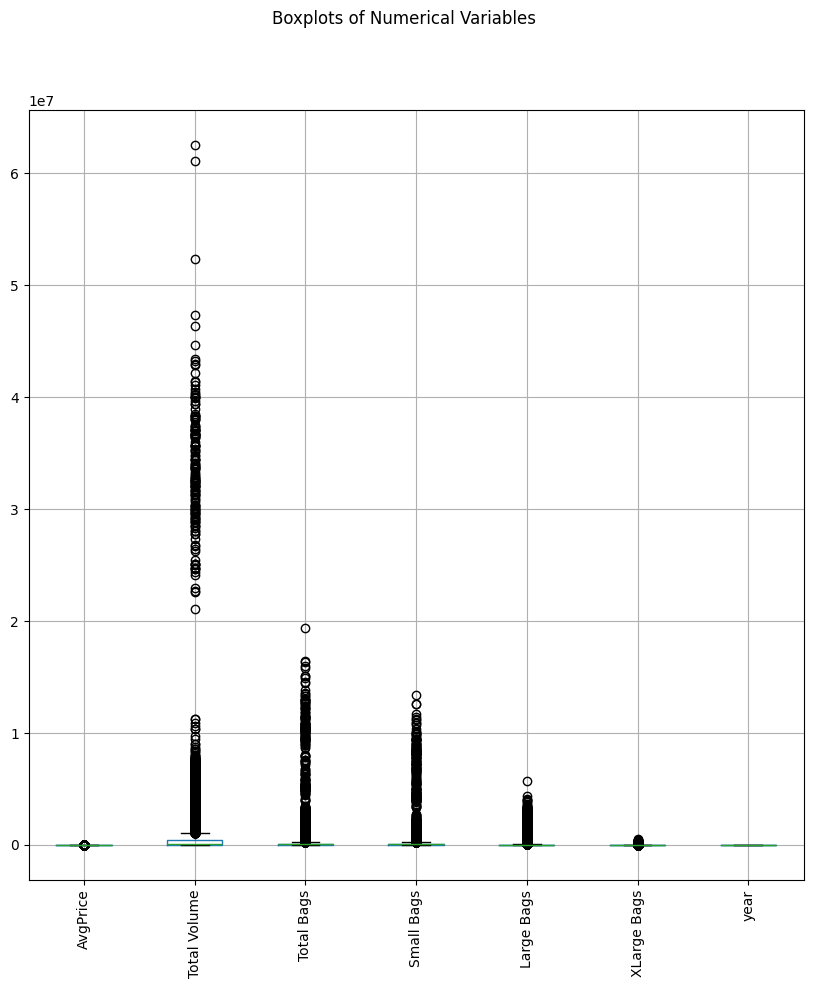

In [9]:
# Boxplots para detectar outliers
df.boxplot(figsize=(10, 10), rot=90)
plt.suptitle('Boxplots of Numerical Variables')
plt.show()

El gráfico de boxplots generado en la celda anterior permite identificar posibles outliers en las variables numéricas del dataset.

1. **Outliers Evidentes**: Se observan valores atípicos significativos en variables como `Total Volume` y `Total Bags`, lo que sugiere la necesidad de un análisis más detallado o un tratamiento de estos valores.

2. **Distribución de los Datos**: La mayoría de las variables presentan una distribución concentrada, con algunos valores extremos que podrían influir en los resultados de los modelos predictivos.

3. **Variabilidad entre Variables**: Las variables relacionadas con los tipos de bolsas (`Small Bags`, `Large Bags`, `XLarge Bags`) muestran una menor dispersión en comparación con otras variables como `Total Volume`.

Este análisis inicial es útil para guiar los próximos pasos en la limpieza y preparación de los datos.


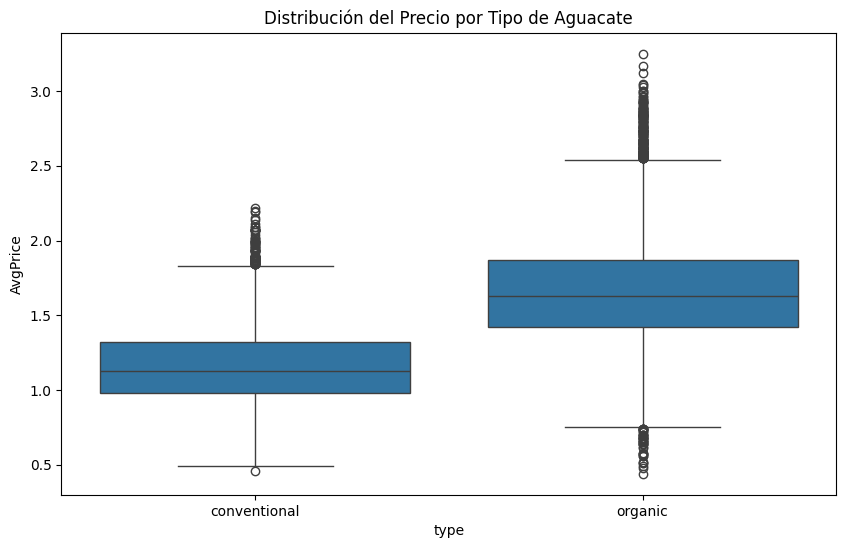

In [10]:
# Distribución del precio por el tipo del aguacate.
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='AvgPrice', data=df)
plt.title('Distribución del Precio por Tipo de Aguacate')
plt.show()

En este caso, el grafico permite evidenciar la diferecia de precios en cuanto a tipo de aguacate se refiere.
Verificando el grafico, los dos tienen una dispersión considerable en sus precios, siendo el 'conventional' el que tiene menor precio entre los dos en general, y el 'organic' el que alcanza los valores mas altos.

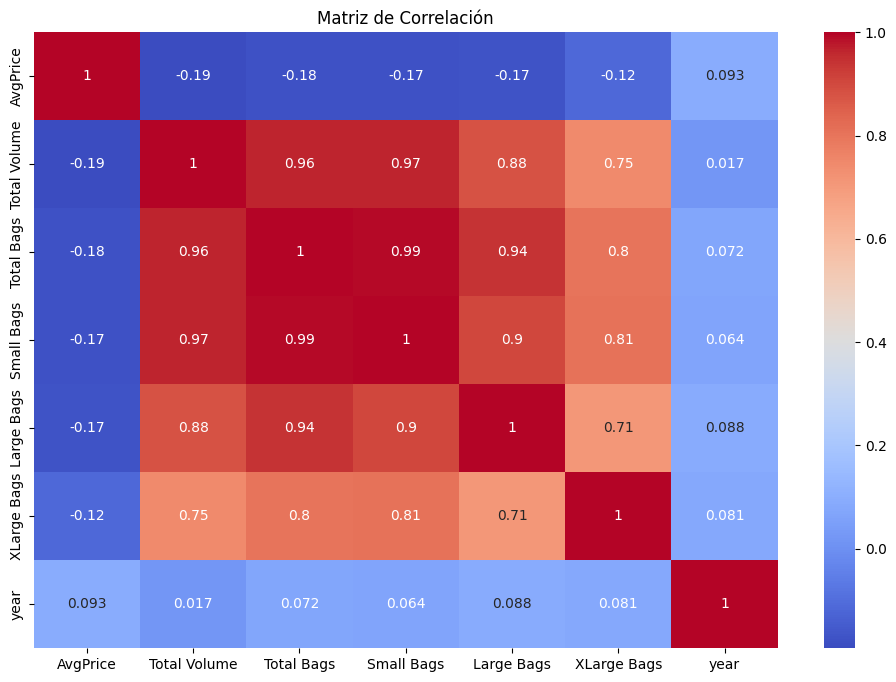

In [12]:
# Matriz de correlación para ver la relación entre las variables numéricas.
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

El gráfico de la matriz de correlación proporciona información valiosa sobre las relaciones entre las variables numéricas del dataset.
1. **Correlaciones Fuertes**:
    - Existe una correlación muy alta entre `Total Bags` y `Small Bags` (r ≈ 0.99), lo que indica que la mayoría de las bolsas totales corresponden a bolsas pequeñas.
    - También se observa una correlación significativa entre `Total Volume` y `Total Bags`, lo que sugiere que el volumen total está estrechamente relacionado con la cantidad de bolsas.

2. **Correlaciones Débiles**:
    - La variable `AvgPrice` muestra correlaciones débiles con las demás variables numéricas, lo que podría indicar que el precio promedio no está directamente influenciado por estas variables.

3. **Implicaciones para el Modelo**:
    - Las variables altamente correlacionadas, como `Total Bags` y `Small Bags`, podrían causar problemas de multicolinealidad en modelos lineales. Es posible que sea necesario eliminar una de estas variables o realizar un análisis más detallado para decidir cuál conservar.
    - La baja correlación de `AvgPrice` con otras variables sugiere que factores externos, como la región o el tipo de aguacate, podrían tener un mayor impacto en el precio promedio.

Este análisis inicial ayuda a identificar relaciones clave entre las variables y guiar los próximos pasos en la construcción de modelos predictivos.

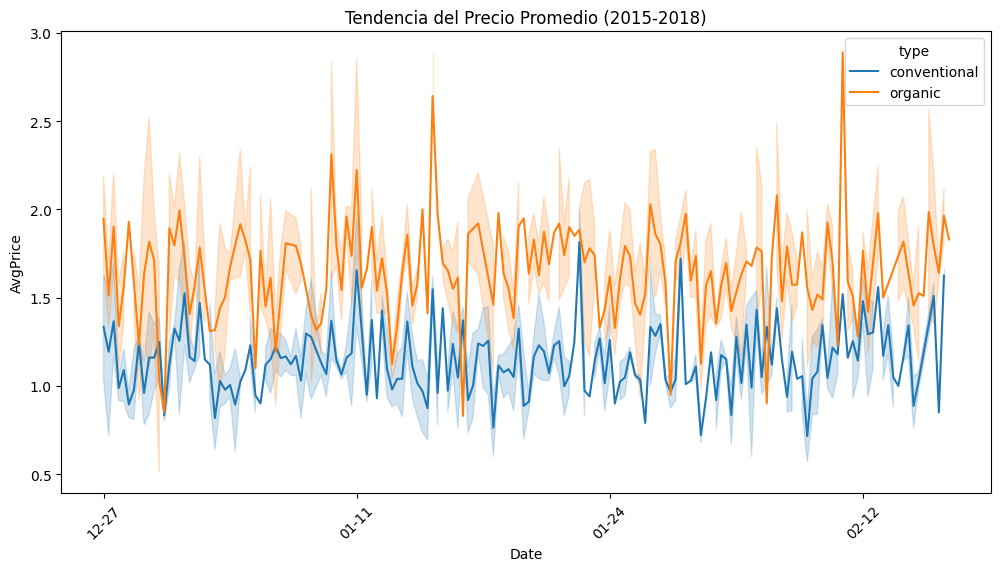

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AvgPrice', hue='type', data=df.sample(1000))  # Muestra aleatoria para evitar saturación
plt.title('Tendencia del Precio Promedio (2015-2018)')
plt.xticks(ticks=range(0, len(df['Date'].unique()), 50), labels=df['Date'].unique()[::50], rotation=45)
plt.show()


El gráfico de tendencia del precio promedio (`AvgPrice`) a lo largo del tiempo, diferenciado por tipo de aguacate (`type`), proporciona información clave:

1. **Tendencias Temporales**:
    - Se observa una fluctuación en los precios promedio de ambos tipos de aguacates a lo largo del tiempo.
    - Los precios de los aguacates orgánicos tienden a ser consistentemente más altos que los de los convencionales.

2. **Estacionalidad**:
    - Es posible identificar patrones estacionales en los precios, con picos y caídas recurrentes en ciertos períodos del año.

3. **Diferencias por Tipo**:
    - Los aguacates orgánicos muestran una mayor variabilidad en los precios, lo que podría estar relacionado con factores como la oferta limitada o la demanda específica.
    - Los aguacates convencionales presentan precios más estables en comparación.

4. **Implicaciones**:
    - Este análisis sugiere que los factores estacionales y el tipo de aguacate son determinantes importantes en la variación de precios.
    - Podría ser útil realizar un análisis más detallado para identificar las causas específicas de las fluctuaciones, como eventos de mercado, cambios en la oferta o demanda, o variaciones regionales.


### **Insights Iniciales**
1. **Distribución de Precios**: Los aguacates orgánicos tienen un precio promedio más alto que los convencionales.
2. **Correlaciones Fuertes**: `Total Bags` está altamente correlacionado con `Small Bags` (r=0.99).
3. **Outliers**: `Total Volume` muestra valores extremos que requieren tratamiento en la fase de limpieza.